In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import sys
import os
home_directory_path = os.path.expanduser('~')
sys.path.append(home_directory_path +'/utils')
from prepare_utils import split_data

import wrangle

import sklearn.preprocessing as skl_pp

1. Apply the scalers we talked about in this lesson to your data and visualize the results for the unscaled and scaled distribution .

In [2]:
df = wrangle.wrangle_zillow_data()

Before I scale, I want to split the data:
- First, I will split 70/15/15 since my data is large.

In [3]:
train, _, _ = split_data(df, test_size=.15, validate_size=.15, random_state=125)
train.head(3)

,bedrooms,bathrooms,sqft,property_value,year_built,property_tax,county
1728610,2,2.0,936,91765,1985,1100.13,LA
882345,4,2.0,1680,101431,1958,1405.06,LA
2005705,4,2.0,1876,76885,1965,1387.54,Orange


In [4]:
y_train = train['property_value']
X_train = train.drop('property_value', axis=1)
X_train_num = train[['bedrooms','bathrooms','sqft','year_built','property_tax']]

Create scalar objects

In [5]:
min_max_scaler = skl_pp.MinMaxScaler()
standard_scaler = skl_pp.StandardScaler()
robust_scaler = skl_pp.RobustScaler()

Fit scalar objects and transform (scale) features

In [6]:
min_max_scaler.fit(X_train_num)
standard_scaler.fit(X_train_num)
robust_scaler.fit(X_train_num)

train_mm_scaled = min_max_scaler.transform(X_train_num)
train_st_scaled = standard_scaler.transform(X_train_num)
train_rb_scaled = robust_scaler.transform(X_train_num)

Visualizing scaled data

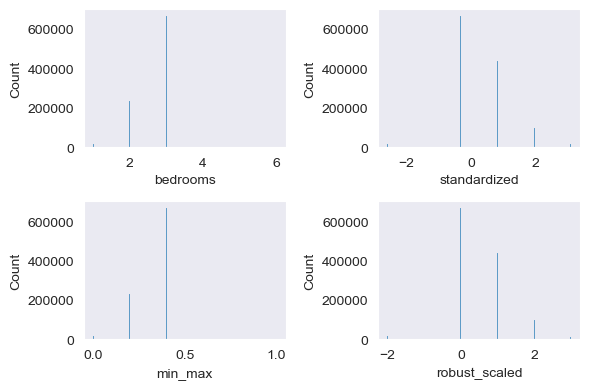

----------------------------------------


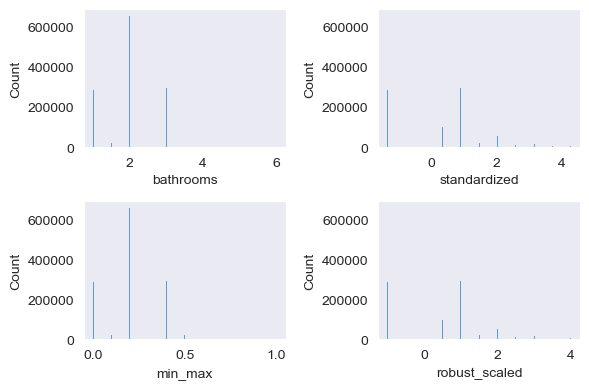

----------------------------------------


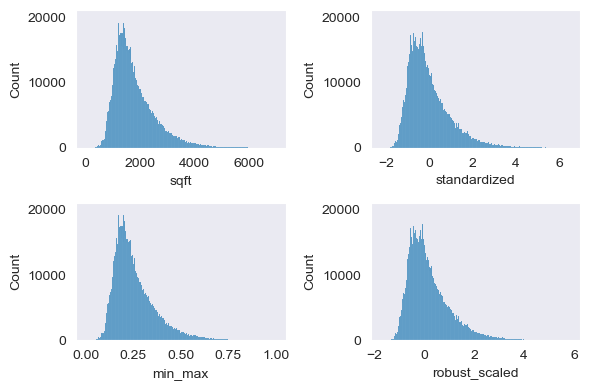

----------------------------------------


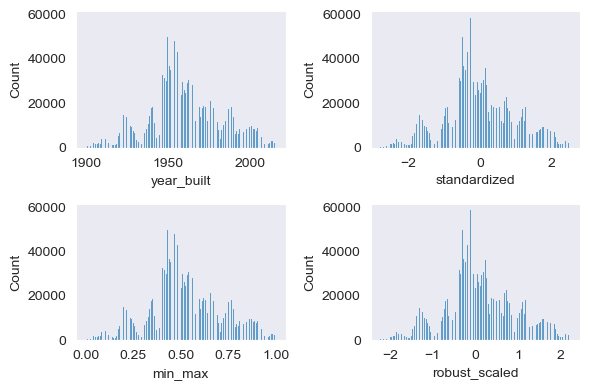

----------------------------------------


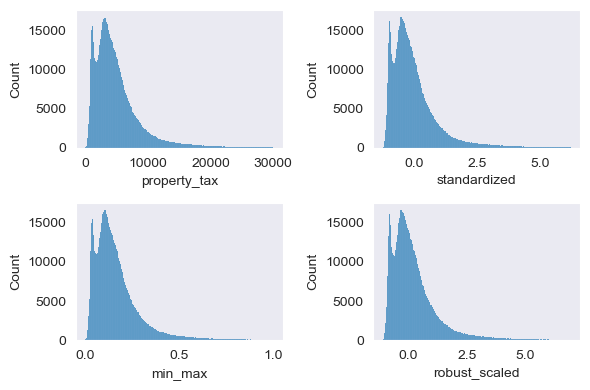

----------------------------------------


In [7]:
for i, col in enumerate(X_train_num.columns):
    sns.set_style('dark')
    fig, axes = plt.subplots(2, 2, figsize=(6, 4))
    
    sns.histplot(X_train_num, x=col, ax=axes[0,0])
    sns.histplot(train_mm_scaled[:,i], ax=axes[1,0])
    axes[1,0].set_xlabel('min_max')
    sns.histplot(train_st_scaled[:,i], ax=axes[0,1])
    axes[0,1].set_xlabel('standardized')
    sns.histplot(train_rb_scaled[:,i], ax=axes[1,1])
    axes[1,1].set_xlabel('robust_scaled')
    plt.tight_layout()
    plt.show()
    print('-'*40)

---
2. Apply the `.inverse_transform` method to your scaled data. Is the resulting dataset the exact same as the original data?
- **Yes**

In [8]:
train_mm_inv = min_max_scaler.inverse_transform(train_mm_scaled)
train_st_inv = standard_scaler.inverse_transform(train_st_scaled)
train_rb_inv = robust_scaler.inverse_transform(train_rb_scaled)

In [9]:
X_train_num

,bedrooms,bathrooms,sqft,year_built,property_tax
1728610,2,2.0,936,1985,1100.13
882345,4,2.0,1680,1958,1405.06
2005705,4,2.0,1876,1965,1387.54
454112,2,2.0,1262,1924,3193.82
411712,3,3.0,1890,1982,4161.07
...,...,...,...,...,...
1150229,2,2.0,1262,1956,4588.80
1290364,3,2.0,1455,1986,2245.62
2062854,2,1.0,1176,1921,3353.89
374659,3,2.0,1144,1964,4998.95


In [10]:
train_mm_inv

array([[2.00000e+00, 2.00000e+00, 9.36000e+02, 1.98500e+03, 1.10013e+03],
       [4.00000e+00, 2.00000e+00, 1.68000e+03, 1.95800e+03, 1.40506e+03],
       [4.00000e+00, 2.00000e+00, 1.87600e+03, 1.96500e+03, 1.38754e+03],
       ...,
       [2.00000e+00, 1.00000e+00, 1.17600e+03, 1.92100e+03, 3.35389e+03],
       [3.00000e+00, 2.00000e+00, 1.14400e+03, 1.96400e+03, 4.99895e+03],
       [4.00000e+00, 3.00000e+00, 1.71000e+03, 1.95500e+03, 1.18110e+03]])

In [11]:
train_st_inv

array([[2.00000e+00, 2.00000e+00, 9.36000e+02, 1.98500e+03, 1.10013e+03],
       [4.00000e+00, 2.00000e+00, 1.68000e+03, 1.95800e+03, 1.40506e+03],
       [4.00000e+00, 2.00000e+00, 1.87600e+03, 1.96500e+03, 1.38754e+03],
       ...,
       [2.00000e+00, 1.00000e+00, 1.17600e+03, 1.92100e+03, 3.35389e+03],
       [3.00000e+00, 2.00000e+00, 1.14400e+03, 1.96400e+03, 4.99895e+03],
       [4.00000e+00, 3.00000e+00, 1.71000e+03, 1.95500e+03, 1.18110e+03]])

In [12]:
train_rb_inv

array([[2.00000e+00, 2.00000e+00, 9.36000e+02, 1.98500e+03, 1.10013e+03],
       [4.00000e+00, 2.00000e+00, 1.68000e+03, 1.95800e+03, 1.40506e+03],
       [4.00000e+00, 2.00000e+00, 1.87600e+03, 1.96500e+03, 1.38754e+03],
       ...,
       [2.00000e+00, 1.00000e+00, 1.17600e+03, 1.92100e+03, 3.35389e+03],
       [3.00000e+00, 2.00000e+00, 1.14400e+03, 1.96400e+03, 4.99895e+03],
       [4.00000e+00, 3.00000e+00, 1.71000e+03, 1.95500e+03, 1.18110e+03]])

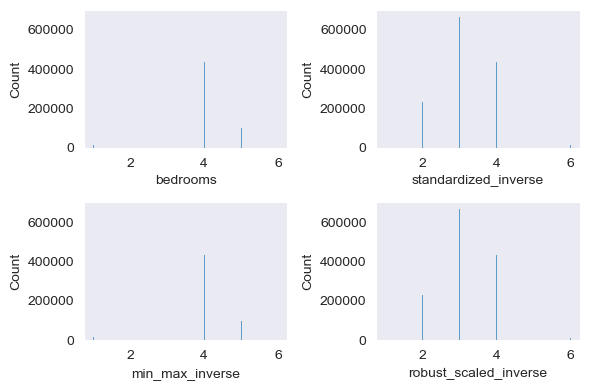

----------------------------------------


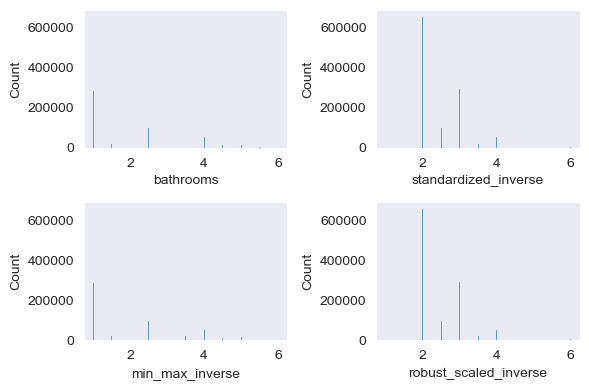

----------------------------------------


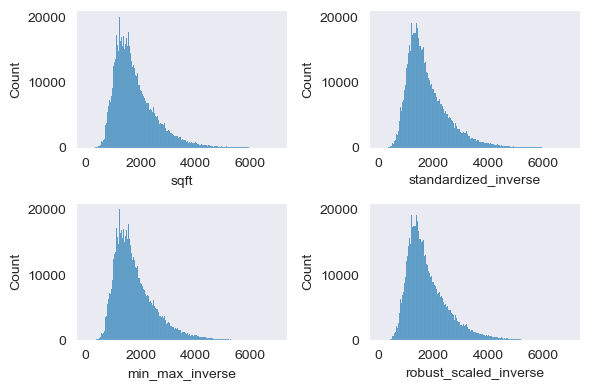

----------------------------------------


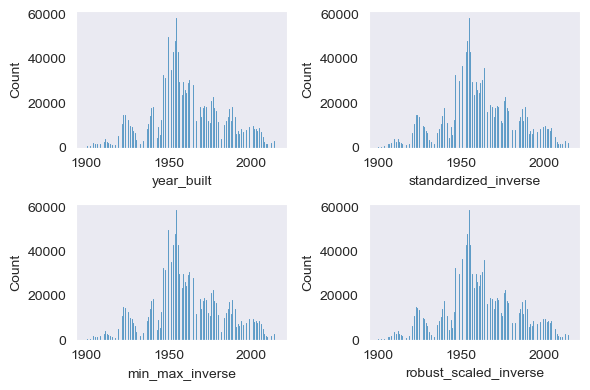

----------------------------------------


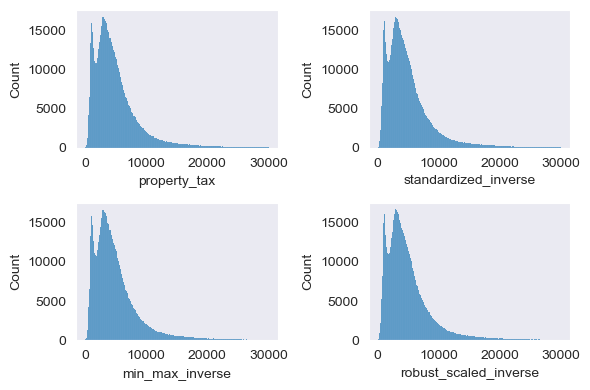

----------------------------------------


In [13]:
for i, col in enumerate(X_train_num.columns):
    sns.set_style('dark')
    fig, axes = plt.subplots(2, 2, figsize=(6, 4))
    
    sns.histplot(X_train_num, x=col, ax=axes[0,0])
    sns.histplot(train_mm_inv[:,i], ax=axes[1,0])
    axes[1,0].set_xlabel('min_max_inverse')
    sns.histplot(train_st_inv[:,i], ax=axes[0,1])
    axes[0,1].set_xlabel('standardized_inverse')
    sns.histplot(train_rb_inv[:,i], ax=axes[1,1])
    axes[1,1].set_xlabel('robust_scaled_inverse')
    plt.tight_layout()
    plt.show()
    print('-'*40)

---
3. Read the documentation for sklearn's `QuantileTransformer`. Use `normal` for the `output_distribution` and apply this scaler to your data. Visualize the result of your data scaling.

In [15]:
qt = skl_pp.QuantileTransformer(output_distribution="normal")
qt.fit(X_train_num)
train_qt_scaled = qt.transform(X_train_num)


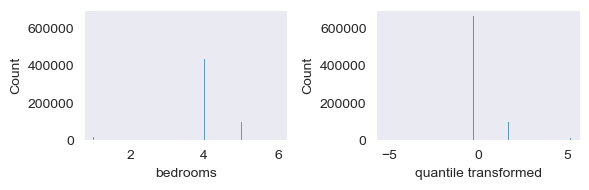

----------------------------------------


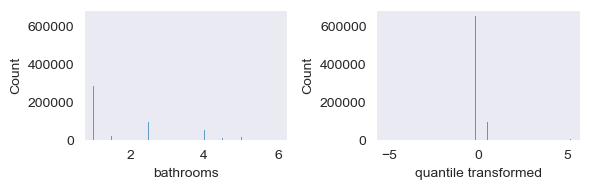

----------------------------------------


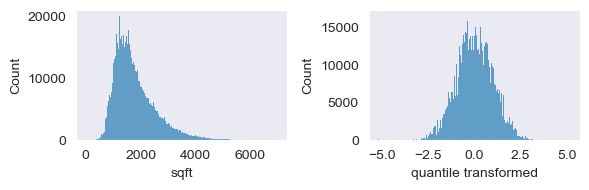

----------------------------------------


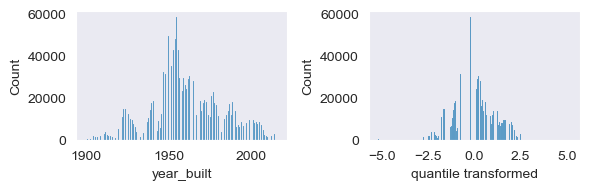

----------------------------------------


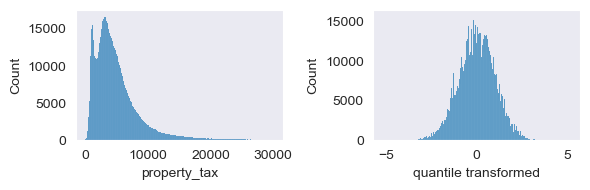

----------------------------------------


In [16]:
for i, col in enumerate(X_train_num.columns):
    sns.set_style('dark')
    fig, axes = plt.subplots(1, 2, figsize=(6, 2))
    
    sns.histplot(X_train_num, x=col, ax=axes[0])
    sns.histplot(train_qt_scaled[:,i], ax=axes[1])
    axes[1].set_xlabel('quantile transformed')
    plt.tight_layout()
    plt.show()
    print('-'*40)

---
4. Use the `QuantileTransformer`, but omit the `output_distribution` argument. Visualize your results. What do you notice?

- **features are transformed to follow a uniform distribution**

In [17]:
qt = skl_pp.QuantileTransformer()
qt.fit(X_train_num)
train_qt_scaled = qt.transform(X_train_num)

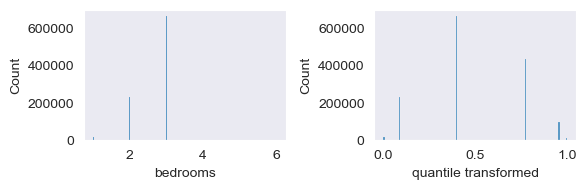

----------------------------------------


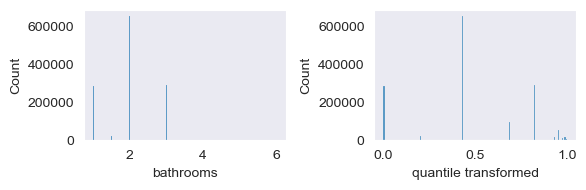

----------------------------------------


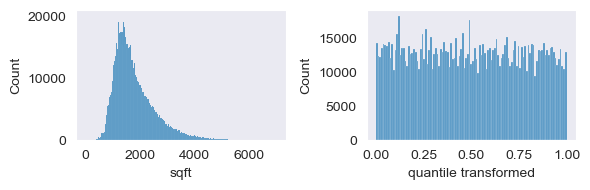

----------------------------------------


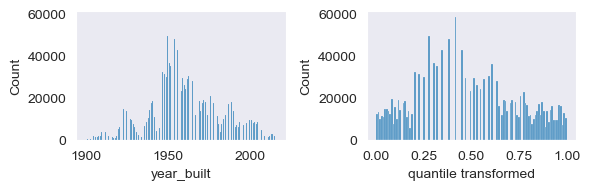

----------------------------------------


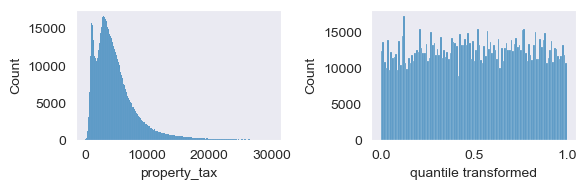

----------------------------------------


In [18]:
for i, col in enumerate(X_train_num.columns):
    sns.set_style('dark')
    fig, axes = plt.subplots(1, 2, figsize=(6, 2))
    
    sns.histplot(X_train_num, x=col, ax=axes[0])
    sns.histplot(train_qt_scaled[:,i], ax=axes[1])
    axes[1].set_xlabel('quantile transformed')
    plt.tight_layout()
    plt.show()
    print('-'*40)

---
5. Based on the work you've done, choose a scaling method for your dataset. Write a function within your `prepare.py` that accepts as input the train, validate, and test data splits, and returns the scaled versions of each. Be sure to only learn the parameters for scaling from your training data!

- **I will choose min-max scaling**

In [19]:
train_mm_scaled

array([[0.2       , 0.2       , 0.1336287 , 0.73275862, 0.03614312],
       [0.6       , 0.2       , 0.23995998, 0.5       , 0.04631349],
       [0.6       , 0.2       , 0.26797199, 0.56034483, 0.04572915],
       ...,
       [0.2       , 0.        , 0.16792911, 0.18103448, 0.11131308],
       [0.4       , 0.2       , 0.16335572, 0.55172414, 0.16618099],
       [0.6       , 0.4       , 0.24424753, 0.47413793, 0.03884373]])

In [20]:
# train[['bedrooms_scaled', 'bathrooms_scaled',
#        'sqft_scaled', 'year_built_scaled','property_tax_scaled']] = train_mm_scaled

In [21]:
train

,bedrooms,bathrooms,sqft,property_value,year_built,property_tax,county
1728610,2,2.0,936,91765,1985,1100.13,LA
882345,4,2.0,1680,101431,1958,1405.06,LA
2005705,4,2.0,1876,76885,1965,1387.54,Orange
454112,2,2.0,1262,264928,1924,3193.82,LA
411712,3,3.0,1890,293699,1982,4161.07,LA
...,...,...,...,...,...,...,...
1150229,2,2.0,1262,390087,1956,4588.80,Orange
1290364,3,2.0,1455,107162,1986,2245.62,LA
2062854,2,1.0,1176,265257,1921,3353.89,LA
374659,3,2.0,1144,424244,1964,4998.95,LA


In [22]:
def scale_data(train, validate, test, cont_features=[]):
    
    X_train = train[cont_features]
    X_validate = validate[cont_features]
    X_test = test[cont_features]
    
    min_max_scaler = skl_pp.MinMaxScaler()
    
    train_mm_scaled = min_max_scaler.fit_transform(X_train)
    val_mm_scaled = min_max_scaler.transform(X_validate)
    test_mm_scaled = min_max_scaler.transform(X_test)
    
    col_names = [col + '_scaled' for col in cont_features]
    
    train[col_names] = train_mm_scaled
    validate[col_names] = val_mm_scaled
    test[col_names] = test_mm_scaled
    
    return train, validate, test

In [23]:
train, validate, test = split_data(df, test_size=.15, validate_size=.15, random_state=125)


In [24]:
train

,bedrooms,bathrooms,sqft,property_value,year_built,property_tax,county
1728610,2,2.0,936,91765,1985,1100.13,LA
882345,4,2.0,1680,101431,1958,1405.06,LA
2005705,4,2.0,1876,76885,1965,1387.54,Orange
454112,2,2.0,1262,264928,1924,3193.82,LA
411712,3,3.0,1890,293699,1982,4161.07,LA
...,...,...,...,...,...,...,...
1150229,2,2.0,1262,390087,1956,4588.80,Orange
1290364,3,2.0,1455,107162,1986,2245.62,LA
2062854,2,1.0,1176,265257,1921,3353.89,LA
374659,3,2.0,1144,424244,1964,4998.95,LA


In [25]:
validate

,bedrooms,bathrooms,sqft,property_value,year_built,property_tax,county
729597,3,1.0,1248,253162,1951,3254.77,LA
1372938,3,2.0,2465,250758,1941,2820.64,LA
1257847,3,1.0,926,64152,1948,799.99,LA
449623,3,2.5,2136,378344,1963,4440.12,Orange
534828,4,2.0,1545,61252,1949,1245.47,LA
...,...,...,...,...,...,...,...
1472743,3,1.0,954,314801,1955,3978.26,LA
527189,3,2.0,1130,720619,1959,8697.47,LA
306457,4,3.0,3986,764659,1986,9381.56,LA
1626117,3,2.0,2257,408012,1928,4973.22,LA


In [26]:
test

,bedrooms,bathrooms,sqft,property_value,year_built,property_tax,county
896531,2,1.0,921,373500,1947,4561.63,LA
194018,5,4.0,1927,501000,1952,5865.08,LA
986919,4,3.0,2740,520887,1979,6517.51,LA
752067,3,2.0,1733,430534,1998,5239.08,Orange
1522215,3,2.0,1528,254459,1944,3600.97,LA
...,...,...,...,...,...,...,...
757641,6,4.0,3876,1644609,2000,19867.65,LA
1763016,2,1.0,924,460391,1940,5476.94,LA
2076715,4,3.0,1460,206937,1963,2660.95,LA
1187252,2,2.0,759,518274,1937,6311.80,LA


In [27]:
t, v, te = scale_data(train, validate, test, 
                      cont_features=['bedrooms', 'bathrooms', 'sqft', 
                                     'year_built', 'property_tax'])
t

,bedrooms,bathrooms,sqft,property_value,year_built,property_tax,county,bedrooms_scaled,bathrooms_scaled,sqft_scaled,year_built_scaled,property_tax_scaled
1728610,2,2.0,936,91765,1985,1100.13,LA,0.2,0.2,0.133629,0.732759,0.036143
882345,4,2.0,1680,101431,1958,1405.06,LA,0.6,0.2,0.239960,0.500000,0.046313
2005705,4,2.0,1876,76885,1965,1387.54,Orange,0.6,0.2,0.267972,0.560345,0.045729
454112,2,2.0,1262,264928,1924,3193.82,LA,0.2,0.2,0.180220,0.206897,0.105974
411712,3,3.0,1890,293699,1982,4161.07,LA,0.4,0.4,0.269973,0.706897,0.138235
...,...,...,...,...,...,...,...,...,...,...,...,...
1150229,2,2.0,1262,390087,1956,4588.80,Orange,0.2,0.2,0.180220,0.482759,0.152501
1290364,3,2.0,1455,107162,1986,2245.62,LA,0.4,0.2,0.207803,0.741379,0.074349
2062854,2,1.0,1176,265257,1921,3353.89,LA,0.2,0.0,0.167929,0.181034,0.111313
374659,3,2.0,1144,424244,1964,4998.95,LA,0.4,0.2,0.163356,0.551724,0.166181


In [28]:
v

,bedrooms,bathrooms,sqft,property_value,year_built,property_tax,county,bedrooms_scaled,bathrooms_scaled,sqft_scaled,year_built_scaled,property_tax_scaled
729597,3,1.0,1248,253162,1951,3254.77,LA,0.4,0.0,0.178219,0.439655,0.108007
1372938,3,2.0,2465,250758,1941,2820.64,LA,0.4,0.2,0.352151,0.353448,0.093528
1257847,3,1.0,926,64152,1948,799.99,LA,0.4,0.0,0.132200,0.413793,0.026133
449623,3,2.5,2136,378344,1963,4440.12,Orange,0.4,0.3,0.305131,0.543103,0.147542
534828,4,2.0,1545,61252,1949,1245.47,LA,0.6,0.2,0.220666,0.422414,0.040991
...,...,...,...,...,...,...,...,...,...,...,...,...
1472743,3,1.0,954,314801,1955,3978.26,LA,0.4,0.0,0.136201,0.474138,0.132138
527189,3,2.0,1130,720619,1959,8697.47,LA,0.4,0.2,0.161355,0.508621,0.289538
306457,4,3.0,3986,764659,1986,9381.56,LA,0.6,0.4,0.569530,0.741379,0.312355
1626117,3,2.0,2257,408012,1928,4973.22,LA,0.4,0.2,0.322424,0.241379,0.165323


In [29]:
te

,bedrooms,bathrooms,sqft,property_value,year_built,property_tax,county,bedrooms_scaled,bathrooms_scaled,sqft_scaled,year_built_scaled,property_tax_scaled
896531,2,1.0,921,373500,1947,4561.63,LA,0.2,0.0,0.131485,0.405172,0.151595
194018,5,4.0,1927,501000,1952,5865.08,LA,0.8,0.6,0.275261,0.448276,0.195069
986919,4,3.0,2740,520887,1979,6517.51,LA,0.6,0.4,0.391453,0.681034,0.216830
752067,3,2.0,1733,430534,1998,5239.08,Orange,0.4,0.2,0.247535,0.844828,0.174190
1522215,3,2.0,1528,254459,1944,3600.97,LA,0.4,0.2,0.218236,0.379310,0.119554
...,...,...,...,...,...,...,...,...,...,...,...,...
757641,6,4.0,3876,1644609,2000,19867.65,LA,1.0,0.6,0.553809,0.862069,0.662099
1763016,2,1.0,924,460391,1940,5476.94,LA,0.2,0.0,0.131914,0.344828,0.182123
2076715,4,3.0,1460,206937,1963,2660.95,LA,0.6,0.4,0.208518,0.543103,0.088201
1187252,2,2.0,759,518274,1937,6311.80,LA,0.2,0.2,0.108332,0.318966,0.209969
